In [1]:
import matplotlib.pyplot as plt
import math

In [3]:
class ComplexNumber:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag

def complex_add(a, b):
    return ComplexNumber(a.real + b.real, a.imag + b.imag)

def complex_subtract(a, b):
    return ComplexNumber(a.real - b.real, a.imag - b.imag)

def complex_multiply(a, b):
    real_part = a.real * b.real - a.imag * b.imag
    imag_part = a.real * b.imag + a.imag * b.real
    return ComplexNumber(real_part, imag_part)

def exp_j(theta):
    return ComplexNumber(math.cos(theta), math.sin(theta))

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0:N:2])
    odd = fft(x[1:N:2])
    T = [exp_j(-2 * math.pi * k / N) for k in range(N // 2)]
    return [complex_add(even[k], complex_multiply(T[k], odd[k])) for k in range(N // 2)] + \
           [complex_subtract(even[k], complex_multiply(T[k], odd[k])) for k in range(N // 2)]

def fft2d(image):
    rows, cols = len(image), len(image[0])

    # FFT along rows
    fft_rows = [fft([ComplexNumber(val, 0) for val in row]) for row in image]

    # Transpose and FFT along columns
    fft_columns = [fft([row[i] for row in fft_rows]) for i in range(cols)]

    return [[ComplexNumber(col[i].real, col[i].imag) for col in fft_columns] for i in range(rows)]

In [4]:
# Generate a 2D image
image_size = 128
x = [i * (4 * math.pi) / (image_size - 1) for i in range(image_size)]
y = [i * (4 * math.pi) / (image_size - 1) for i in range(image_size)]
X, Y = [[x_val for _ in range(image_size)] for x_val in x], [[y_val for y_val in y] for _ in range(image_size)]
image = [[math.sin(X[i][j]) + math.cos(Y[i][j]) for j in range(image_size)] for i in range(image_size)]

In [5]:
# Perform 2D FFT
fft_magnitude = [[math.sqrt(x.real**2 + x.imag**2) for x in row] for row in fft2d(image)]

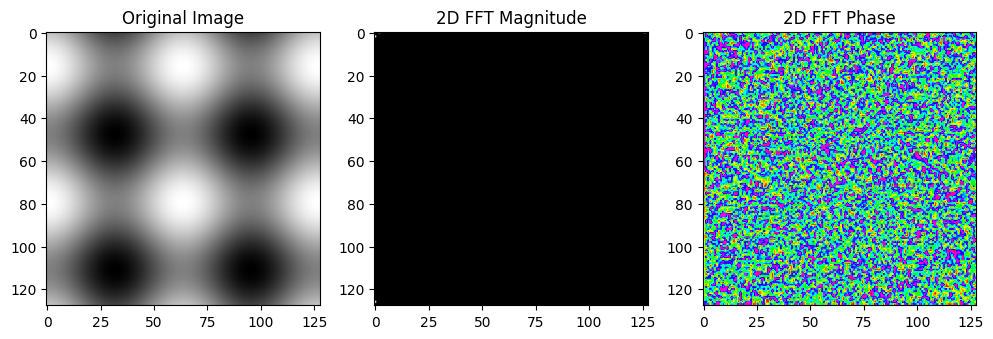

In [6]:
# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(fft_magnitude, cmap='gray')  # Magnitude
plt.title('2D FFT Magnitude')
plt.subplot(133)
plt.imshow([[math.atan2(x.imag, x.real) for x in row] for row in fft2d(image)], cmap='hsv')  # Phase
plt.title('2D FFT Phase')
plt.show()